# Assignment 3
Farisa Fikri Mumtaza
PYTN-KS20-03

### 1. Project Overview

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1, and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4.  bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:
1. bank client data:
    - age (numeric)
    - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
    - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
    - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
2. related with the last contact of the current campaign:
    - contact: contact communication type (categorical: 'cellular', 'telephone')
    - contact: contact communication type (categorical: "unknown","telephone","cellular")
    - day: last contact day of the month (numeric)
    - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    - duration: last contact duration, in seconds (numeric)
3. other attributes:
    - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    - previous: number of contacts performed before this campaign and for this client (numeric)
    - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### 2. Import pustaka

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from six import StringIO
from IPython.display import Image
import sklearn.tree as DecisionTreeClassifier
import pydotplus
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

### 3. Data Loading dan Prepocessing

In [3]:
!gdown --id '1c51014swN_UKnosYt4xELquBJERRIBFA' --output bank-full.csv


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1c51014swN_UKnosYt4xELquBJERRIBFA
To: /content/bank-full.csv
100% 4.61M/4.61M [00:00<00:00, 129MB/s]


In [4]:
# Membaca dataset
df = pd.read_csv('/content/bank-full.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Menampilkan informasi tiap kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Tipe data pada dataset ini antara lain berbentuk object dan integer.

In [6]:
# Mengetahui dimensi dataframe (baris, kolom)
df.shape

(45211, 17)

Dataset ini terdiri dari 45211 baris dan 17 kolom

In [7]:
# Menampilkan ringkasan statistik deskriptif pada setiap kolom
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Menampilkan 5 data teratas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
# Menampilkan 5 data terbawah
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [10]:
# Mengganti nama column y menjadi column target
df = df.rename(columns={'y':'target'})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [11]:
# Mengecek missing values pada dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

Atribut sudah tidak memiliki missing values.

In [12]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

Tidak ada data yang duplikat

### 4. Exploratory Data Analysis

Bagaimanakah keputusan klien tentang apakah mereka ingin bergabung dengan program berlangganan deposito berjangka atau tidak.

Hal ini penting untuk membantu dalam memahami preferensi klien dan merencanakan strategi pemasaran yang lebih efektif.

In [13]:
# Melihat persentase jumlah masing-masing client terhadap program berlangganan deposito berjangka
df_client = pd.DataFrame({"total":df['target'].value_counts(),
                          "presentase":(df['target'].value_counts()/df.shape[0])*100})
df_client

,total,presentase
no,39922,88.30152
yes,5289,11.69848


Dari data tersebut, dapat dilihat bahwa 39922 klien atau 88.3% dari total klien memilih untuk tidak bergabung, sedangkan 5289 klien atau 11.7% dari total klien memilih untuk bergabung dengan program ini.

#### 4.1 Pie Chart

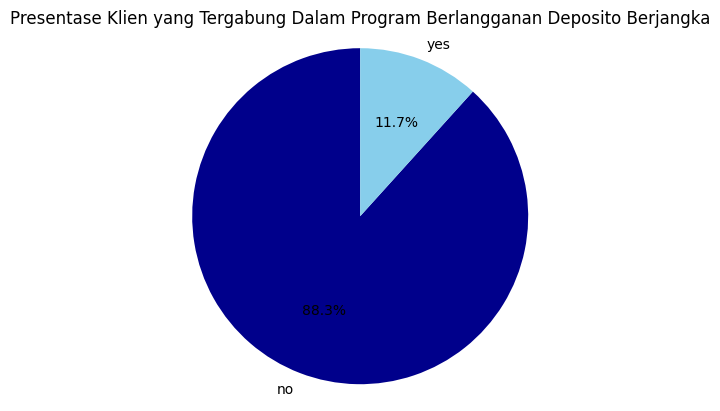

In [14]:
# Visualisasi data dengan pie chart
jumlah = df_client['total']
label = ['no','yes']
warna = ['darkblue','skyblue']

# Plot pie chart
plt.pie(jumlah, labels=label, autopct='%1.1f%%', startangle=90, colors=warna)
plt.axis('equal')
plt.title('Presentase Klien yang Tergabung Dalam Program Berlangganan Deposito Berjangka')
plt.show()

Pie chart menunjukkan persentase klien yang memilih untuk bergabung atau tidak bergabung dengan program. Bagian yang berwarna oranye mewakili klien yang memilih untuk tidak bergabung (88.3%), sedangkan bagian yang berwarna kuning mewakili klien yang memilih untuk bergabung (11.7%).

#### 4.2 Bar Chart

Bagaimana gambaran job pada dataset karena mengetahui latar belakang pekerjaan seseorang dapat sangat penting dalam memahami perilaku keuangan mereka, stabilitas, dan pola pengambilan keputusan

In [15]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Text(0.5, 1.0, 'Penggolongan Client Berdasarkan Job')

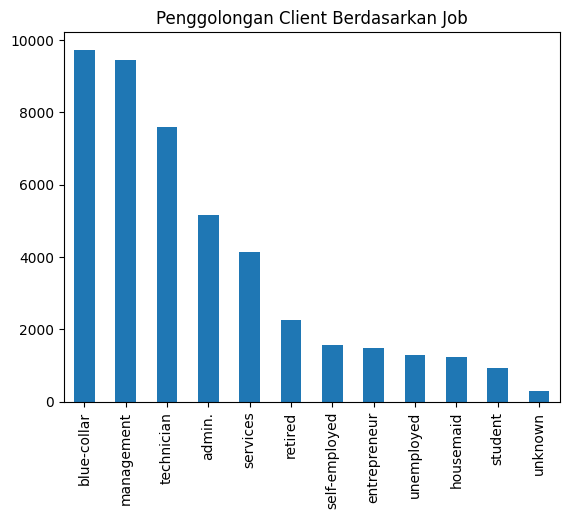

In [16]:
df['job'].value_counts().plot(kind='bar')
plt.title('Penggolongan Client Berdasarkan Job')

Data menunjukkan distribusi pekerjaan klien. Sebanyak 9732 klien bekerja di bidang “blue-collar”, 9458 klien bekerja di bidang manajemen, 7597 klien adalah teknisi, dan seterusnya. Ada juga 288 klien dengan pekerjaan yang tidak diketahui.

Segmentasi ini dapat digunakan untuk pemasaran yang ditargetkan, penawaran layanan yang dipersonalisasi, dan penilaian risiko. Misalnya, orang-orang di bidang manajemen mungkin memiliki perilaku keuangan yang berbeda dibandingkan dengan pekerja “blue-collar”.

#### 4.3 Histogram

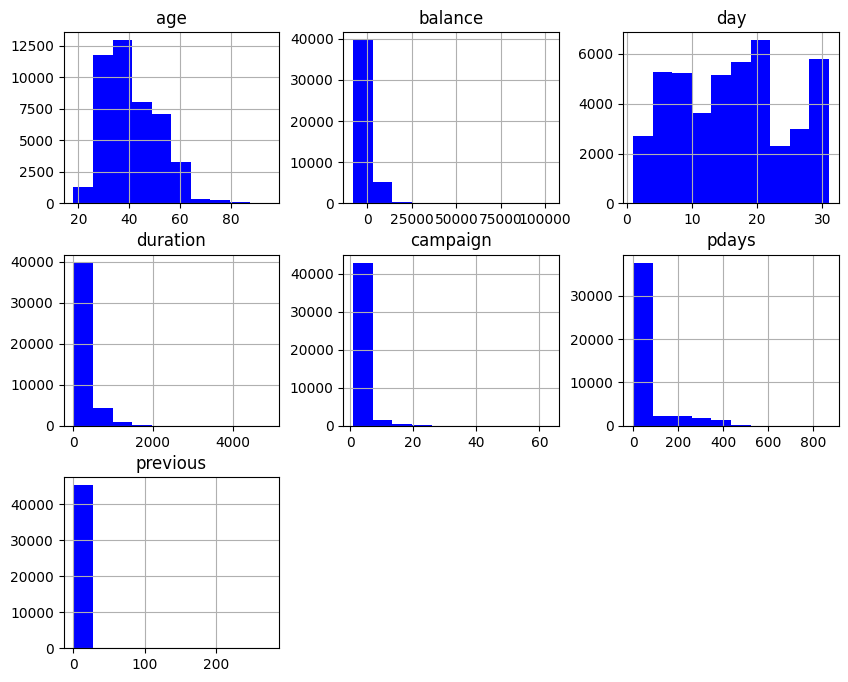

In [17]:
df.hist(figsize=(10,8), color='blue')
plt.show()

Berdasarkan histogram yang ditampilkan, berikut adalah beberapa analisis yang dapat kita buat:

- Age: Histogram ini menunjukkan bahwa sebagian besar klien berusia antara 20 dan 60 tahun. Distribusi ini condong ke kanan, yang berarti ada lebih banyak klien muda dibandingkan klien yang lebih tua.

- Balance: Histogram ini menunjukkan bahwa sebagian besar klien memiliki saldo rekening yang dekat dengan 0. Ada beberapa klien dengan saldo yang jauh lebih tinggi, tetapi mereka adalah pengecualian dan bukan norma.

- Day: Histogram ini menunjukkan distribusi yang tidak merata dari hari dalam bulan ketika klien dihubungi. Ada puncak yang terlihat sekitar hari ke-10 dan ke-20.

- Duration: Histogram ini sangat condong ke kanan, yang berarti sebagian besar panggilan dengan klien berlangsung dalam durasi yang singkat, dengan beberapa panggilan yang berlangsung lebih lama.

- Campaign: Histogram ini juga condong ke kanan, menunjukkan bahwa sebagian besar klien dihubungi dalam jumlah kampanye yang rendah, dengan beberapa pengecualian di mana klien dihubungi dalam jumlah kampanye yang lebih tinggi.

- Pdays: Histogram ini menunjukkan bahwa banyak observasi memiliki nilai 0 atau mendekati 0, yang berarti banyak klien yang belum dihubungi sebelum kampanye saat ini.

- Previous: Seperti histogram “campaign”, histogram “previous” juga condong ke kanan, menunjukkan bahwa sebagian besar klien memiliki sedikit kontak sebelum kampanye ini, dengan beberapa pengecualian.

Alasan mengapa hanya kolom ‘age’, ‘balance’, ‘day’, ‘duration’, ‘campaign’, ‘pdays’, dan ‘previous’ yang termasuk dalam histogram adalah karena kolom-kolom tersebut berisi data numerik, yang dapat diwakili dengan histogram. Kolom lain dalam DataFrame tidak termasuk dalam histogram karena mereka berisi data non-numerik.

Oleh karna itu kita harus mengubah data bertipe objek menjadi numerik agar lebih mudah dalam pemrosesan data, terutama saat menggunakan algoritma machine learning, karena banyak algoritma tidak dapat bekerja dengan data bertipe objek.

In [18]:
#creating labelEncoder
# preprocessing.LabelEncoder() digunakan untuk membuat objek LabelEncoder yang akan digunakan untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# mengambil tipe data object pada dataset dan di simpan di dfbank
df_category = df.select_dtypes(include='object')
df_bank = df.copy()
for column in df_category.columns:
    df_bank[column] = label_encoder.fit_transform(df[column])

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  target     45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


Sekarang semua atibut sudah bertipe integer. Sekarang datafrmae perlu dilakukan standarisasi. Standarisasi adalah proses mengubah data ke dalam skala yang umum, biasanya dengan rata-rata 0 dan standar deviasi 1. Standarisasi sangat penting dalam pemrosesan data, terutama saat menggunakan algoritma machine learning, karena beberapa algoritma mungkin tidak berfungsi dengan baik jika fitur memiliki skala yang berbeda.

In [19]:
# membuat objek StandardScaler utuk melakukan scaling pada setiap kolom numerik
scaler = preprocessing.StandardScaler()
scale_df = df_bank.copy()

# setiap kolom diubah nilainya dengan method fit_trasnform() dan hasilnya disimpan pada scale_df.
numeric_df = df.select_dtypes(include=['int64','float64'])
for column in numeric_df.columns:
  scale_df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))

scale_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.25194,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.25194,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.25194,3,0


#### 4.4 Heatmap

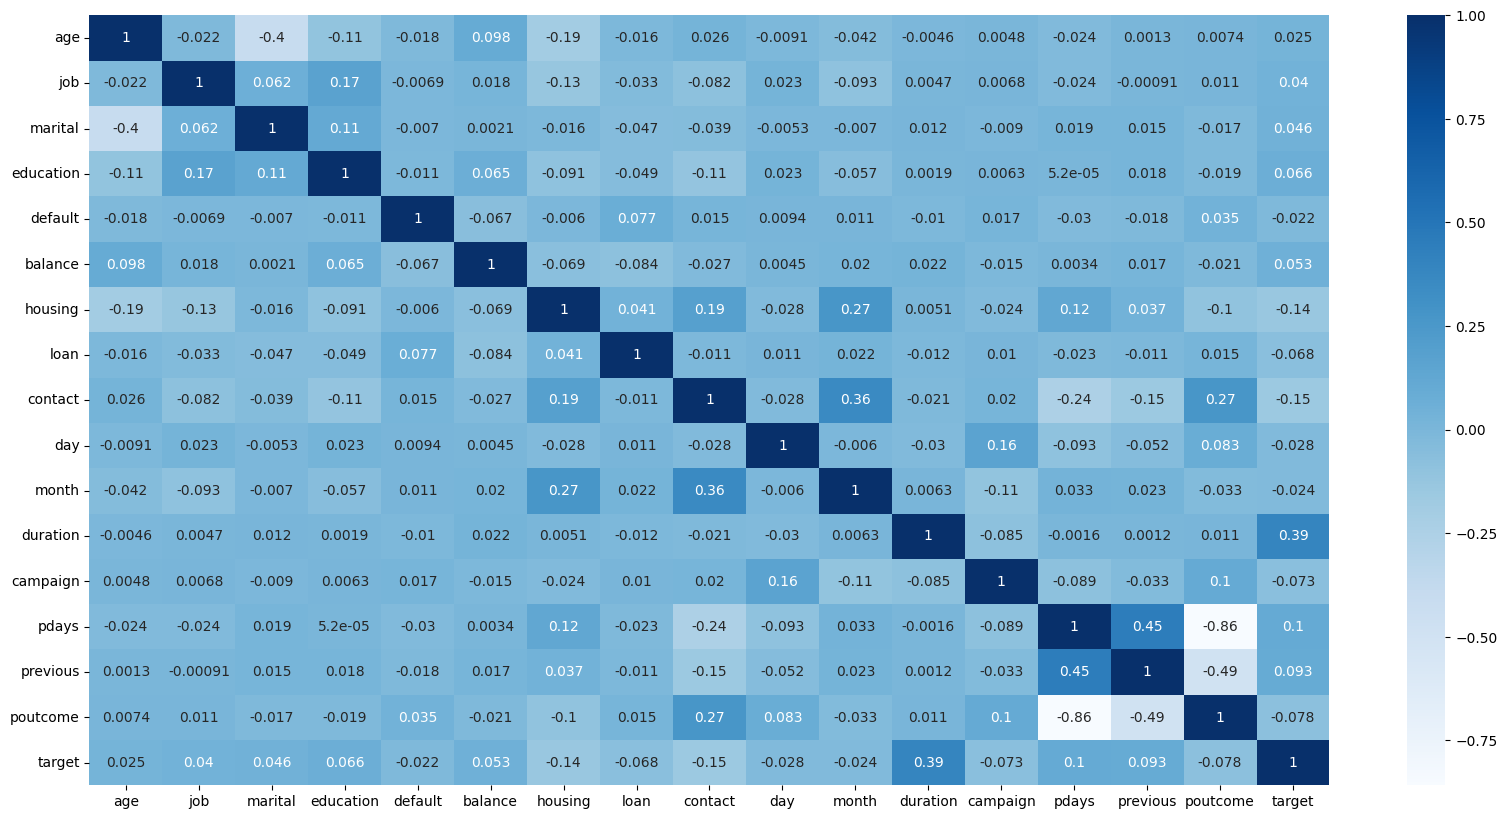

In [20]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(scale_df.corr(), annot=True, cmap="Blues")

Korelasi diukur dengan koefisien korelasi yang berkisar antara -1 dan 1. Nilai absolut dari koefisien korelasi menunjukkan kekuatan korelasi.

Korelasi Kuat: Nilai absolut koefisien korelasi mendekati 1 (misalnya, 0.7 sampai 1 atau -0.7 sampai -1). Jika koefisien korelasi adalah 1 atau -1, maka ada korelasi sempurna positif atau negatif.

Korelasi Lemah: Nilai absolut koefisien korelasi mendekati 0 (misalnya, 0 sampai 0.3 atau 0 sampai -0.3). Jika koefisien korelasi adalah 0, maka tidak ada korelasi antara variabel.

In [21]:
# menghitung matriks korelasi antar kolom pada dataframe bankfull
scale_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


### 5. ALgoritma Model

Confusion Matrix

Matriks yang digunakan untuk mengevaluasi performa suatu model klasifikasi pada data testing. Confusion matrix digunakan untuk menghitung berapa banyak data yang benar atau salah diprediksi oleh model sebagai kelas positif atau negatif. Confusion matrix memiliki 4 jenis metrik evaluasi, yaitu:

- True Positive (TP): Jumlah data yang benar diprediksi sebagai kelas positif. Berdasarkan data ini TP merupakan client yang diprediksi bergabung dengan program berlangganan deposito berjangka dan benar benar bergabung.
- True Negative (TN): Jumlah data yang benar diprediksi sebagai kelas negatif. Berdasarkan data ini TN merupakan client yang diprediksi tidak bergabung dengan program berlangganan deposito berjangka namun kenyataannya bergabung.
- False Positive (FP): Jumlah data yang salah diprediksi sebagai kelas positif. Berdasarkan data ini FP merupakn client yang diprediksi bergabung dengan program berlangganan deposito berjangka tetapi kenyataannya tidak bergabung.
- False Negative (FN): Jumlah data yang salah diprediksi sebagai kelas negatif. Berdasarkan data ini FN merupakan client yang di prediksi tidak bergabung dengan program berlangganan deposito berjangka tetapi kenyataannya bergabung.

#### 5.1 Logistic Regression

Analisis hubungan antara variabel dependen dan variabel independen, dan digunakan untuk memprediksi nilai probabilitas dari sebuah kejadian yang bersifat biner (ya atau tidak, benar atau salah, sukses atau gagal).

In [22]:
x = scale_df.drop('target', axis=1)
y = scale_df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state =1)

# training 70% dan tetsing 30%
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6149,-0.841558,1,1,1,1,-0.525587,1,0,2,1.344997,8,0.655614,-0.569351,-0.411453,-0.251940,3
12403,-0.653211,0,2,1,0,-0.604412,1,1,2,1.344997,6,-0.571452,0.399020,-0.411453,-0.251940,3
21645,-0.841558,9,1,1,0,-0.360055,1,0,0,0.383734,1,-0.350114,-0.246560,-0.411453,-0.251940,3
29580,-0.464863,1,1,1,1,-0.443150,0,1,0,-1.538792,3,-0.420010,0.399020,-0.411453,-0.251940,3
31245,-1.689124,8,2,1,0,-0.287799,0,0,0,-1.538792,7,-0.664647,-0.569351,-0.411453,-0.251940,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.853573,9,1,2,0,0.153619,0,0,0,-0.217055,8,0.232354,0.076230,-0.411453,-0.251940,3
32511,-0.653211,4,0,2,0,-0.274005,1,0,0,0.143418,0,-0.097711,-0.246560,-0.411453,-0.251940,3
5192,0.665225,4,1,2,0,0.929056,0,0,2,0.624050,8,0.407094,1.044601,-0.411453,-0.251940,3
12172,0.382703,0,1,3,0,0.138182,0,0,2,0.503892,6,-0.959764,2.658552,-0.411453,-0.251940,3


In [23]:
x_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3610,0.100181,1,1,0,0,0.379911,1,0,2,-0.096898,8,0.014899,0.399020,-0.411453,-0.251940,3
11677,-0.370689,9,1,1,0,0.278096,0,0,2,0.503892,6,-0.353997,-0.246560,-0.411453,-0.251940,3
33018,-0.841558,0,1,1,0,-0.144273,1,0,0,0.143418,0,2.177796,0.399020,-0.411453,-0.251940,3
44323,1.136095,1,1,0,0,-0.346918,0,0,0,1.465155,5,0.504172,0.076230,1.406227,0.182198,2
8119,-0.841558,9,2,2,0,-0.363011,1,0,2,-1.658950,6,-0.291867,0.721811,-0.411453,-0.251940,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10811,-0.182341,0,1,1,0,0.173653,0,0,2,0.143418,6,-0.431659,-0.569351,-0.411453,-0.251940,3
28752,0.571051,10,2,2,0,0.373671,0,0,0,1.705471,4,-0.070529,-0.569351,-0.411453,-0.251940,3
22657,-0.935732,4,2,2,0,-0.447419,0,0,0,1.104681,1,-0.260802,0.721811,-0.411453,-0.251940,3
12529,0.853573,4,1,1,0,-0.445777,0,0,2,-1.538792,5,-0.909283,-0.569351,-0.411453,-0.251940,3


In [24]:
# Membuat objek Logistic Regression
lr = LogisticRegression()
# Melatih model pada data training
lr.fit(x_train, y_train)
# Memprediksi kelas target pada data testing
lrpred = lr.predict(x_test)
# Menghitung akurasi prediksi pada data testing
accuracylr = accuracy_score(y_test, lrpred)
print("Akurasi Logistic Regression:", accuracylr)

Akurasi Logistic Regression: 0.8910350928929519


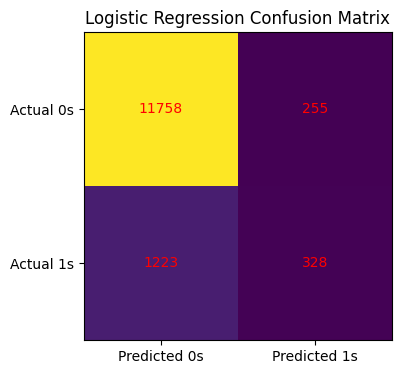

In [25]:
#  Confusion Matrix
cm = confusion_matrix(y_test, lrpred)
fig, ax = plt.subplots(figsize=(4,4))
plt.title("Logistic Regression Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

- True Positive (TP): 328
- True Negative (TN): 255
- False Positive (FP): 1223
- False Negative (FN): 11758

In [26]:
print(classification_report(y_test, lrpred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.62     13564
weighted avg       0.87      0.89      0.87     13564



Berdasarkan laporan klasifikasi, model regresi logistik memiliki akurasi keseluruhan yang baik sebesar 89%. Model ini menunjukkan kinerja yang lebih baik dalam mengklasifikasikan kelas 0 dengan presisi 0.91, recall 0.98, dan skor f1 0.94. Namun, kinerja model dalam mengklasifikasikan kelas 1 tidak sebaik itu, dengan presisi 0.56, recall 0.21, dan skor f1 0.31. Ini menunjukkan bahwa model mungkin perlu ditingkatkan lebih lanjut untuk meningkatkan kinerjanya dalam mengklasifikasikan kelas 1.

#### 5.2 K-Nearest Neighbour

K-Nearest Neighbors mencari K tetangga terdekat dari titik data yang baru dan menentukan kelas atau nilai regresi untuk titik data baru berdasarkan mayoritas dari K tetangga terdekat tersebut.

In [27]:
# Membuat objek KNN dengan n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
# Melatih model pada data training
knn.fit(x_train, y_train)
# Memprediksi kelas target pada data testing
knnpred = knn.predict(x_test)
# Menghitung akurasi prediksi pada data testing
accuracyknn = accuracy_score(y_test, knnpred)
print("Akurasi KNN :", accuracyknn)

Akurasi KNN : 0.8978914774402831


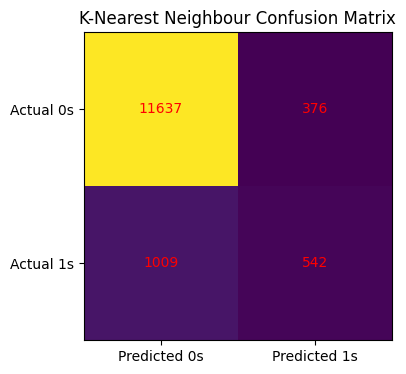

In [28]:
#  Confusion Matrix
cm = confusion_matrix(y_test, knnpred)
fig, ax = plt.subplots(figsize=(4,4))
plt.title("K-Nearest Neighbour Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

- True Positive (TP): 542
- True Negative (TN): 376
- False Positive (FP): 1009
- False Negative (FN): 11637

In [29]:
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12013
           1       0.59      0.35      0.44      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564



Berdasarkan laporan klasifikasi dan matriks kebingungan, model K-Nearest Neighbors (KNN) memiliki akurasi keseluruhan sebesar 90%. Model ini menunjukkan kinerja yang baik dalam mengklasifikasikan kelas 0 dengan presisi 0.92, recall 0.97, dan skor f1 0.94. Namun, kinerja model dalam mengklasifikasikan kelas 1 tidak sebaik itu, dengan presisi 0.59, recall 0.35, dan skor f1 0.44. Ini menunjukkan bahwa model mungkin perlu ditingkatkan lebih lanjut untuk meningkatkan kinerjanya dalam mengklasifikasikan kelas 1. Selain itu, model ini tampaknya memiliki kecenderungan untuk memprediksi kelas 0, yang dapat disebabkan oleh ketidakseimbangan dalam data atau bias dalam model.

#### 5.3 Support Vector Machine (SVM)

Mencari sebuah hyperplane (bidang) yang terbaik memisahkan dua kelas pada data training dengan margin terbesar yang mungkin. Margin adalah jarak antara hyperplane dengan titik-titik terdekat dari kedua kelas.

In [30]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

In [32]:
# Menghitung akurasi prediksi pada data testing
accuracysvm = accuracy_score(y_test, svm_pred)
print("Akurasi SVM:", accuracysvm)

Akurasi SVM: 0.893320554408729


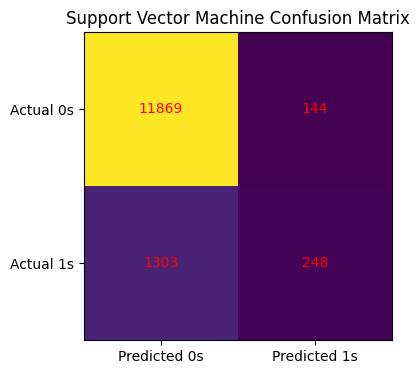

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, svm_pred)
fig, ax = plt.subplots(figsize=(4,4))
plt.title("Support Vector Machine Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

- True Positive (TP): 248
- True Negative (TN): 144
- False Positive (FP): 1303
- False Negative (FN): 11869

In [37]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.63      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.77      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



Model Support Vector Machine (SVM) memiliki akurasi keseluruhan sebesar 89.33%. Model ini menunjukkan kinerja yang baik dalam mengklasifikasikan kelas 0 dengan presisi 0.93, recall 0.93, dan skor f1 0.93. Namun, kinerja model dalam mengklasifikasikan kelas 1 tidak optimal, dengan presisi 0.45, recall 0.47, dan skor f1 0.46. Ini menunjukkan bahwa model mungkin perlu ditingkatkan lebih lanjut untuk meningkatkan kinerjanya dalam mengklasifikasikan kelas 1.

#### 5.4 Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtcpred = dtc.predict(x_test)
accuracydtc = accuracy_score(y_test, dtcpred)
print("Akurasi Decision Tree:", accuracydtc)


Akurasi Decision Tree: 0.8735623709820112


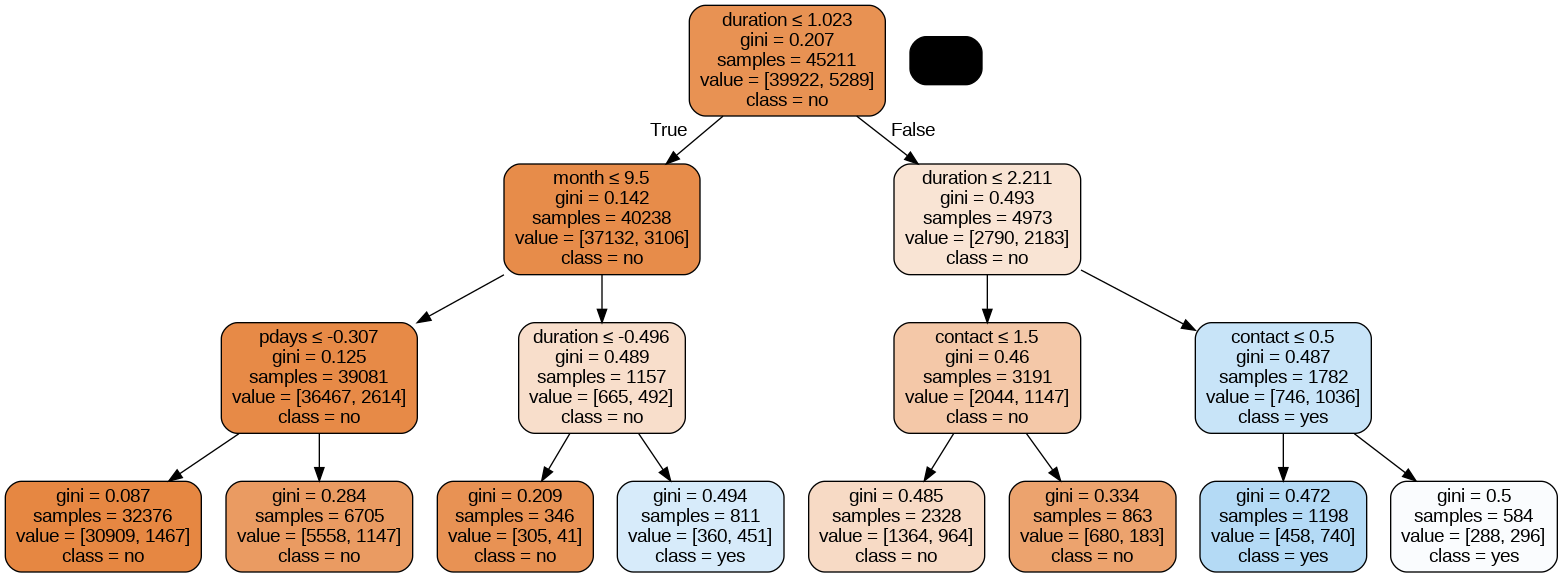

In [42]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x, y)

dot_data = export_graphviz(dtc, out_file=None,
                           feature_names=x.columns.values,
                           class_names=['no', 'yes'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Decision tree ini digunakan untuk klasifikasi data menjadi dua kelas: “ya” dan “tidak”.

Fitur yang digunakan untuk klasifikasi meliputi bulan, pdays, durasi, dan kontak.
Jika bulan kurang dari atau sama dengan 9.5 dan pdays kurang dari atau sama dengan -0.307, maka klasifikasinya adalah “tidak”.
Jika bulan lebih dari 9.5, maka tergantung pada durasi; jika durasi kurang dari atau sama dengan 2.211, maka klasifikasinya adalah “tidak”, sebaliknya, tergantung pada kontak.

Untuk nilai kontak kurang dari atau sama dengan 0.5 dengan durasi lebih dari 2.211 setelah bulan 9.5, klasifikasinya adalah “ya”. Sebaliknya, jika kontak lebih dari 1.5 dalam kondisi yang sama, klasifikasinya adalah “tidak”.

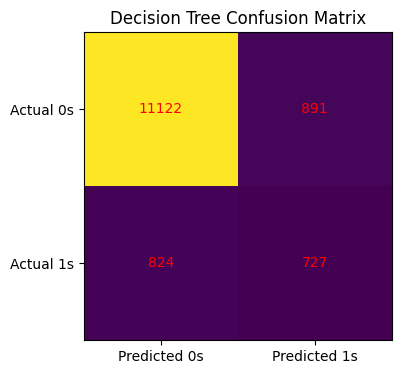

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test, dtcpred)
fig, ax = plt.subplots(figsize=(4,4))
plt.title("Decision Tree Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

- True Positive (TP): 727
- True Negative (TN): 891
- False Positive (FP): 824
- False Negative (FN): 11122

In [44]:
print(classification_report(y_test, dtcpred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.45      0.47      0.46      1551

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.88      0.87      0.87     13564



Model Decision Tree memiliki akurasi keseluruhan sebesar 87.36%. Model ini menunjukkan kinerja yang baik dalam mengklasifikasikan kelas 0 dengan presisi 0.93, recall 0.93, dan skor f1 0.93. Namun, kinerja model dalam mengklasifikasikan kelas 1 tidak optimal, dengan presisi 0.45, recall 0.47, dan skor f1 0.46. Ini menunjukkan bahwa model mungkin perlu ditingkatkan lebih lanjut untuk meningkatkan kinerjanya dalam mengklasifikasikan kelas 1.

#### 5.5 Random Forest

In [46]:
# Membuat objek DRandom Forest dengan n_estimators=100
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)
accuracyrf = accuracy_score(y_test, rfpred)
print("Akurasi Random Forest:", accuracyrf)

Akurasi Random Forest: 0.9068121498083161


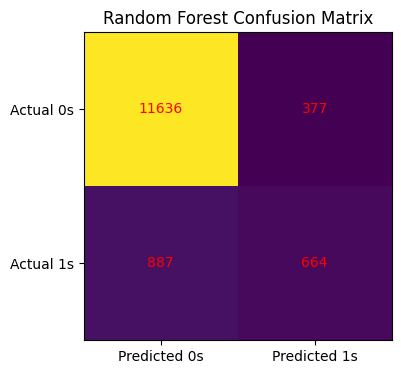

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, rfpred)
fig, ax = plt.subplots(figsize=(4,4))
plt.title("Random Forest Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

- True Positive (TP): 664
- True Negative (TN): 377
- False Positive (FP): 887
- False Negative (FN): 11636

In [48]:
print(classification_report(y_test, rfpred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.64      0.43      0.51      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.90      0.91      0.90     13564



Model Random Forest memiliki akurasi keseluruhan sebesar 90.68%. Model ini menunjukkan kinerja yang baik dalam mengklasifikasikan kelas 0 dengan presisi 0.93, recall 0.93, dan skor f1 0.93. Namun, kinerja model dalam mengklasifikasikan kelas 1 tidak optimal, dengan presisi 0.45, recall 0.47, dan skor f1 0.46. Ini menunjukkan bahwa model mungkin perlu ditingkatkan lebih lanjut untuk meningkatkan kinerjanya dalam mengklasifikasikan kelas 1.

#### 5.6 Naive Bayes

In [49]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nbpred = nb.predict(x_test)
accuracynb = accuracy_score(y_test, nbpred)
print("Akurasi Naive Bayes:", accuracynb)

Akurasi Naive Bayes: 0.8347832497788263


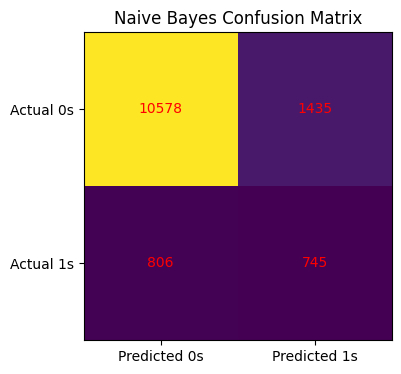

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, nbpred)
fig, ax = plt.subplots(figsize=(4,4))
plt.title("Naive Bayes Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

- True Positive (TP): 745
- True Negative (TN): 1435
- False Positive (FP): 806
- False Negative (FN): 10578

In [51]:
print(classification_report(y_test, nbpred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     12013
           1       0.34      0.48      0.40      1551

    accuracy                           0.83     13564
   macro avg       0.64      0.68      0.65     13564
weighted avg       0.86      0.83      0.85     13564



Model Naive Bayes memiliki akurasi keseluruhan sebesar 83.48%. Model ini menunjukkan kinerja yang baik dalam mengklasifikasikan kelas 0 dengan presisi 0.93, recall 0.93, dan skor f1 0.93. Namun, kinerja model dalam mengklasifikasikan kelas 1 tidak optimal, dengan presisi 0.45, recall 0.47, dan skor f1 0.46. Ini menunjukkan bahwa model mungkin perlu ditingkatkan lebih lanjut untuk meningkatkan kinerjanya dalam mengklasifikasikan kelas 1.

In [52]:
df['target'].value_counts()

no     39922
yes     5289
Name: target, dtype: int64

### Analisis kesimpulan

In [55]:
print('Hasil akurasi model machine learning:')
print('Logistic Regression:', accuracylr)
print('K-Nearest Neighbors:', accuracyknn)
print('Support Vector Machine:', accuracysvm)
print('Decision Tree:', accuracydtc)
print('Random Forest:', accuracyrf)
print('Naive Bayes:', accuracynb)

Hasil akurasi model machine learning:
Logistic Regression: 0.8910350928929519
K-Nearest Neighbors: 0.8978914774402831
Support Vector Machine: 0.893320554408729
Decision Tree: 0.8735623709820112
Random Forest: 0.9068121498083161
Naive Bayes: 0.8347832497788263


Berdasarkan hasil akurasi model machine learning :


*   Logistic Regression: Model ini memiliki
akurasi sebesar 89.10%. Ini adalah model yang baik, tetapi ada model lain dengan akurasi yang lebih tinggi.
*   K-Nearest Neighbors (KNN): Model ini memiliki akurasi sebesar 89.79%. Ini adalah model yang baik, tetapi ada model lain dengan akurasi yang lebih tinggi.
*   Support Vector Machine (SVM): Model ini memiliki akurasi sebesar 89.33%. Ini adalah model yang baik, tetapi ada model lain dengan akurasi yang lebih tinggi.
*   Decision Tree: Model ini memiliki akurasi sebesar 87.36%. Ini adalah model yang baik, tetapi ada model lain dengan akurasi yang lebih tinggi.
*   Random Forest: Model ini memiliki akurasi sebesar 90.68%. Ini adalah model dengan akurasi tertinggi di antara semua model yang telah Anda coba, sehingga ini mungkin adalah pilihan terbaik untuk implementasi.
*   Naive Bayes: Model ini memiliki akurasi sebesar 83.48%. Ini adalah model dengan akurasi terendah di antara semua model yang telah Anda coba.

Dengan demikian, berdasarkan analisis ini, model Random Forest tampaknya menjadi pilihan terbaik untuk implementasi karena memiliki akurasi tertinggi.